In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import os

### Merging the 12 months of sales data into a single csv file

In [163]:
files = [file for file in os.listdir('Sales_data')]
all_months_data = pd.DataFrame()

for file in files:
  df = pd.read_csv("Sales_data/"+file)
  all_months_data = pd.concat([all_months_data, df])


all_months_data.to_csv("all_data.csv", index=False)

In [164]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"


###Cleaning the dataset by removing NaN value

In [165]:
nan_values = all_data[all_data.isna().any(axis=1)]
all_data = all_data.dropna(how='all')

Converting the columns to the right type

In [166]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors = 'coerce')
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors = 'coerce')

<ipython-input-166-5903df848986>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors = 'coerce')


###Adding additional columns

In [167]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], errors = 'coerce')

<ipython-input-167-5bc01af03d76>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], errors = 'coerce')


In [168]:
#Adding month column
all_data['Month'] = all_data['Order Date'].dt.month

In [169]:
#Adding sales column
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [170]:
#Adding hour column
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

In [171]:
#Adding city column
def get_city(address):
  try:
    return address.split(',')[1]
  except IndexError:
    return None

def get_state(address):
  try:
    return address.split(',')[2].split(' ')[1]
  except IndexError:
    return None

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

In [173]:
None_values = all_data[all_data['City'] == 'None (None)'].index
all_data.drop(None_values, axis=0, inplace=True)

###Question1: What was the best month for sales? How much was earned that month?

In [174]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Hour,Minute,City
0,259358,34in Ultrawide Monitor,1.0,379.99,2019-10-28 10:56:00,"609 Cherry St, Dallas, TX 75001",10.0,379.99,10.0,56.0,Dallas (TX)
1,259359,27in 4K Gaming Monitor,1.0,389.99,2019-10-28 17:26:00,"225 5th St, Los Angeles, CA 90001",10.0,389.99,17.0,26.0,Los Angeles (CA)
2,259360,AAA Batteries (4-pack),2.0,2.99,2019-10-24 17:20:00,"967 12th St, New York City, NY 10001",10.0,5.98,17.0,20.0,New York City (NY)
3,259361,27in FHD Monitor,1.0,149.99,2019-10-14 22:26:00,"628 Jefferson St, New York City, NY 10001",10.0,149.99,22.0,26.0,New York City (NY)
4,259362,Wired Headphones,1.0,11.99,2019-10-07 16:10:00,"534 14th St, Los Angeles, CA 90001",10.0,11.99,16.0,10.0,Los Angeles (CA)


In [175]:
results = all_data.groupby('Month')['Sales'].sum()

In [177]:
print(results)

Month
1.0     1822256.73
2.0     2202022.42
3.0     2807100.38
4.0     3390670.24
5.0     3152606.75
6.0     2577802.26
7.0     2647775.76
8.0     2244467.88
9.0     2097560.13
10.0    3736726.88
11.0    3199603.20
12.0    4613443.34
Name: Sales, dtype: float64


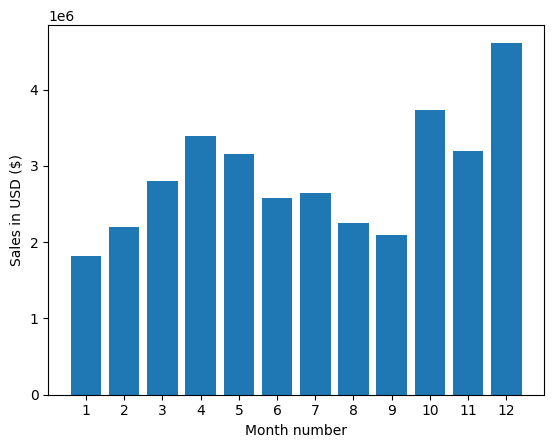

In [176]:
#Visualisation
months = range(1, 13)

plt.bar(months, results)
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

###Question 2: What city had the highest number of sales

In [181]:
result2 = all_data.groupby('City')['Sales'].sum()

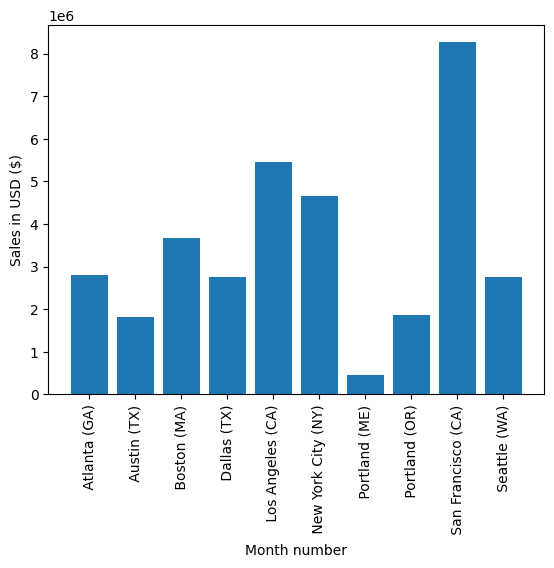

In [182]:
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, result2)
plt.xticks(cities, rotation = 'vertical')
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

###Question3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [183]:
result3 = all_data.groupby('Hour')['Sales'].sum()

In [187]:
print(result3)

Hour
0.0      713721.27
1.0      460866.88
2.0      234851.44
3.0      145757.89
4.0      162661.01
5.0      230679.82
6.0      448113.00
7.0      744854.12
8.0     1192348.97
9.0     1639030.58
10.0    1944286.77
11.0    2300610.24
12.0    2316821.34
13.0    2155389.80
14.0    2083672.73
15.0    1941549.60
16.0    1904601.31
17.0    2129361.61
18.0    2219348.30
19.0    2412938.54
20.0    2281716.24
21.0    2042000.86
22.0    1607549.21
23.0    1179304.44
Name: Sales, dtype: float64


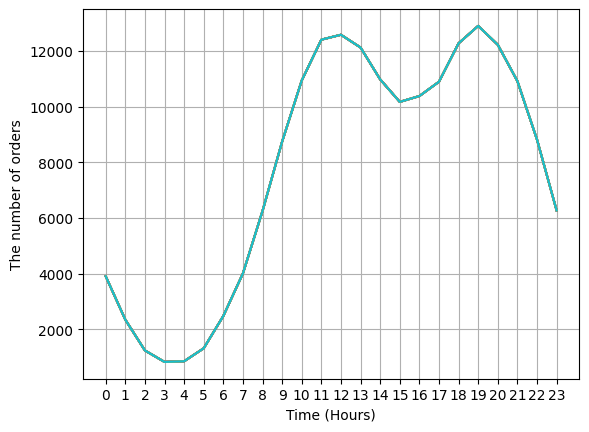

In [188]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby('Hour').count())
plt.xlabel('Time (Hours)')
plt.ylabel('The number of orders')
plt.xticks(hours)
plt.grid()
plt.show()

###Question4: What products are most often sold together?

In [189]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

<ipython-input-189-50d7ea3b1e2b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
62,259420,"Google Phone,USB-C Charging Cable"
65,259422,"Google Phone,USB-C Charging Cable"
82,259438,"iPhone,Lightning Charging Cable"
103,259458,"34in Ultrawide Monitor,ThinkPad Laptop"
123,259477,"LG Dryer,AAA Batteries (4-pack)"


In [191]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in df['Grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
  print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### What product sold the most? Why do you think it sold the most?

<function matplotlib.pyplot.show(close=None, block=None)>

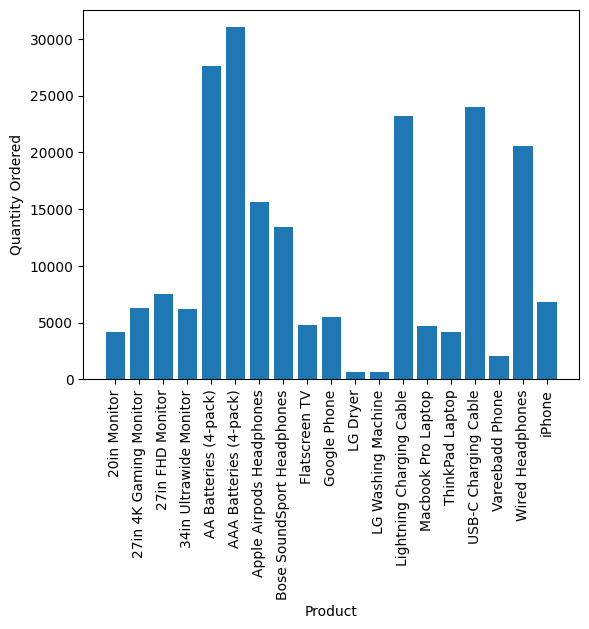

In [211]:
products = [product for product, df in all_data.groupby('Product')]
quantity_sold = all_data.groupby('Product')['Quantity Ordered'].sum()

plt.bar(products, quantity_sold)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products, rotation = 'vertical', size = 10)
plt.show

<ipython-input-212-6aaad5c0595b>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  ax2.plot(products, prices, 'b-', color='orange')
<ipython-input-212-6aaad5c0595b>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical')


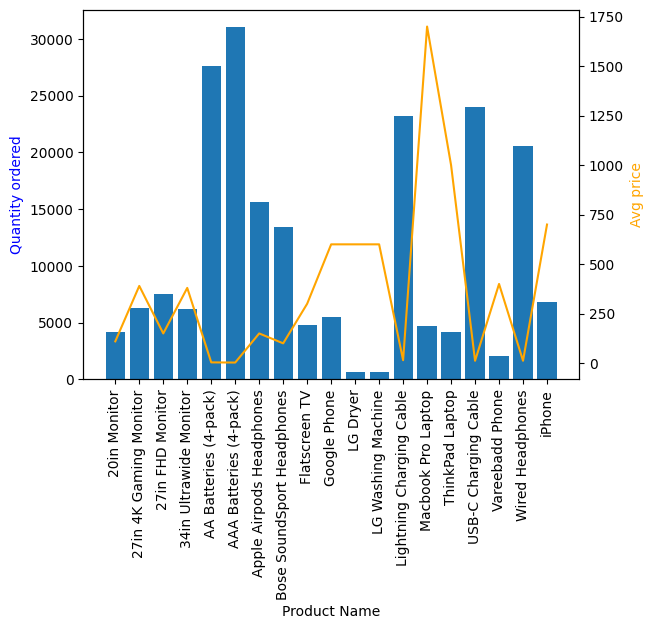

In [212]:
#Plotting bar graph with line chart, where the number of product sold and its average prices were illustrated
prices = all_data.groupby('Product')['Price Each'].mean()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_sold)
ax2.plot(products, prices, 'b-', color='orange')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity ordered', color='b')
ax1.set_xticklabels(products, rotation = 'vertical')

ax2.set_ylabel('Avg price', color='orange')

plt.show()